In [110]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import text
from sqlalchemy import Column, Integer, String, Float , Boolean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [5]:
#Base = declarative_base()

#class moives(Base):
#    __tablename__ = 'movies'
#    adult = Column(Boolean)
#    original_title = Column(String())
#   release_date = Column(String())
#    imdb_id = Column(String(), primary_key=True)
#    popularity = Column(String())


In [10]:
engine = create_engine("sqlite:///movies.sqlite")
conn = engine.connect()

In [11]:
#insert movies data
data = pd.read_csv('./CleanedCSV/reduced_Clean.csv')
data.to_sql('movies', engine)

45332

In [14]:
#insert goof data
data2 = pd.read_csv('./CleanedCSV/goofsnocommas.csv')
data2.to_sql('goofs', engine)

40001

In [42]:
#check the column names
with engine.connect() as conn:
    result1 = conn.execute('SELECT * FROM goofs')
    result2 = conn.execute('SELECT * FROM movies')

 
print(f'{result1._metadata.keys} + {result2._metadata.keys}')

RMKeyView(['index', 'title', 'imdb_id', 'category', 'goof']) + RMKeyView(['index', 'adult', 'original_title', 'release_date', 'imdb_id', 'popularity'])


In [103]:
# get goofs per year
with engine.connect() as conn:
    
    #get the resulting table
    result = conn.execute(text("SELECT movies.release_date, goofs.title, COUNT(goofs.goof) as num_goofs FROM goofs INNER JOIN movies ON goofs.imdb_id = movies.imdb_id GROUP BY goofs.title;"))
      
    # convert the result to a pandas.DataFrame
    movies_year = pd.DataFrame(result)

movies_year.head()


,release_date,title,num_goofs
0,1997-05-30,'Til There Was You,0
1,1994-09-01,1-900,0
2,1996-11-17,101 Dalmatians,22
3,1957-03-25,12 Angry Men,27
4,1995-12-29,12 Monkeys,33


In [104]:
movies_year.release_date =  pd.to_datetime(movies_year.release_date)
movies_year['year'] = pd.DatetimeIndex(movies_year.release_date).year


In [105]:
plot_data = movies_year.groupby('year').mean()
plot_data = plot_data.reset_index(level=0)
plot_data = plot_data.sort_values('year')
plot_data.head()

,year,num_goofs
0,1922,14.0
1,1927,14.5
2,1929,1.0
3,1930,16.0
4,1931,2.0


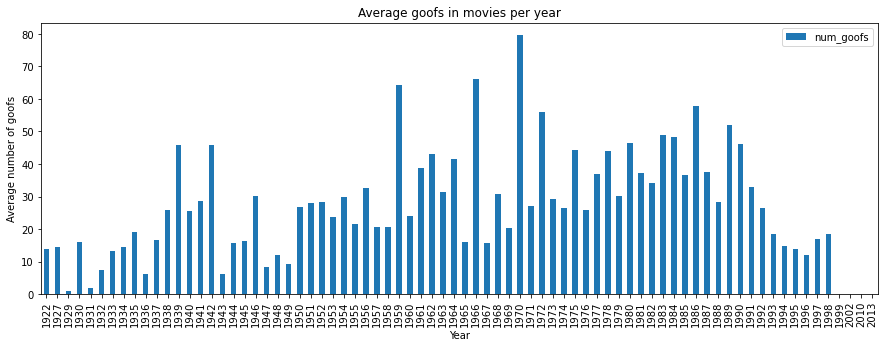

In [119]:
plot_data.plot(kind = 'bar', x = 'year', y = 'num_goofs', figsize = [15,5])
plt.xlabel('Year')
plt.ylabel('Average number of goofs')
plt.title('Average goofs in movies per year')
plt.savefig('./plots/goofs_by_year.png')
plt.show()

In [97]:
#get goofs per popularity
with engine.connect() as conn:
    
    #get the resulting table
    result = conn.execute(text("SELECT movies.popularity, goofs.title, COUNT(goofs.goof) as num_goofs FROM goofs INNER JOIN movies ON goofs.imdb_id = movies.imdb_id GROUP BY goofs.title;"))
      
    # convert the result to a pandas.DataFrame
    movies_pop = pd.DataFrame(result)

movies_pop.head()

,popularity,title,num_goofs
0,2.700061,'Til There Was You,0
1,0.062128,1-900,0
2,11.470748,101 Dalmatians,22
3,16.503959,12 Angry Men,27
4,12.297305,12 Monkeys,33


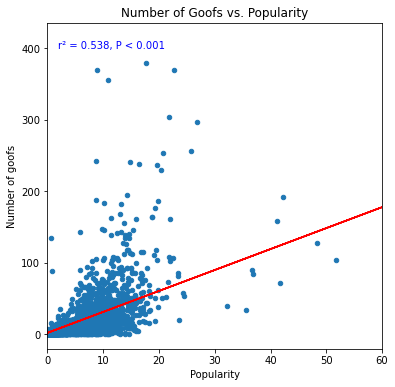

In [121]:
linreg = st.linregress(movies_pop.popularity, movies_pop.num_goofs)
movies_pop.plot(kind = 'scatter', x = 'popularity', y = 'num_goofs', figsize = [6,6])
plt.plot(movies_pop.popularity, (movies_pop.popularity*linreg[0])+linreg[1], color = 'red')
plt.text(2,400,f'r\u00B2 = {round(linreg[2],3)}, P < 0.001', color = 'blue')
plt.xlim(left = 0, right = 60)
plt.xlabel('Popularity')
plt.ylabel('Number of goofs')
plt.title('Number of Goofs vs. Popularity')
plt.savefig('./plots/goofs_pop.png')
plt.show()